# Previsão de Churn no Serviço de Cartão de Crédito de um Banco

Neste projeto, o objetivo é construir um <b>modelo de aprendizado de máquina</b> para prever a probabilidade de churn dos clientes no serviço de cartão de crédito de um banco. O modelo utilizará <b>aprendizado supervisionado</b>, com um conjunto de dados rotulado, onde o <b>alvo</b> será <b>1</b> caso o cliente tenha cancelado o serviço (churn), e <b>0</b> caso contrário.

A abordagem seguirá um <b>fluxo de trabalho estruturado baseado no modelo CRISP-DM</b>, que inclui as seguintes etapas:

1. **Definir o problema de negócios.**
2. **Coletar e explorar os dados.**
3. **Dividir os dados em conjuntos de treinamento e teste.**
4. **Realizar análise exploratória de dados (EDA).**
5. **Engenharia de características, limpeza e pré-processamento dos dados.**
6. **Treinamento do modelo, comparação, seleção de características e ajuste.**
7. **Testes finais do modelo e avaliação.**
8. **Conclusões e interpretação dos resultados.**
9. **Implantação do modelo.**

Neste <b>notebook</b>, vamos focar na <b>análise exploratória de dados (EDA)</b>, abordando as etapas 1 a 4 do fluxo de trabalho. O principal <b>objetivo</b> é obter <b>insights valiosos sobre os padrões de churn</b> com base nas características disponíveis. Esses insights ajudarão a entender melhor os fatores que contribuem para a saída dos clientes, antes mesmo de construir um modelo preditivo. Além disso, explicarei detalhadamente as escolhas feitas durante o processo.

---

## 1. Problema de Negócios

Um <b>gerente</b> de um banco está preocupado com o crescente número de <b>clientes que estão deixando os serviços de cartão de crédito</b>. A alta taxa de churn tem impactado negativamente nos resultados da instituição. O banco busca uma solução para <b>prever a probabilidade de um cliente cancelar o serviço</b>, de modo que possam atuar de forma proativa para <b>melhorar a retenção e reduzir a perda de clientes.</b>

### 1.1 Contexto

Quando um banco adquire um novo cliente para seu serviço de cartão de crédito, três <b>Indicadores-chave de Desempenho (KPIs)</b> são essenciais para medir o sucesso do negócio:

- **1. Custo de Aquisição de Cliente (CAC):** Mede o custo total para adquirir cada novo cliente, incluindo despesas com marketing, vendas e outras ações. Um CAC mais baixo indica uma aquisição mais eficiente.
  
- **2. Valor do Tempo de Vida do Cliente (CLV):** Estima o valor total que o banco espera gerar de um cliente ao longo do seu relacionamento com o banco. Um CLV mais alto significa que o cliente trará mais retorno financeiro ao longo do tempo.

- **3. Taxa de Churn:** A taxa de churn é a porcentagem de clientes que abandonam o serviço durante um período específico. Esse indicador é fundamental para avaliar a retenção de clientes.

Esses KPIs ajudam o banco a avaliar a eficácia de suas estratégias de aquisição de clientes e a prever o impacto financeiro das ações tomadas. O objetivo é <b>minimizar o CAC e o churn, enquanto maximiza o CLV.</b>

### 1.2 Objetivos do Projeto

- **1. Identificar os fatores associados ao churn dos clientes.**
- **2. Desenvolver um modelo preditivo para calcular a probabilidade de churn de cada cliente.**
- **3. Fornecer recomendações práticas para o banco reduzir a taxa de churn dos clientes.**

### 1.3 Por que usar a abordagem de probabilidade?

A principal vantagem de prever a <b>probabilidade de churn</b> em vez de apenas classificar os clientes como "churned" ou "não churned" é a possibilidade de obter informações mais detalhadas. Ao gerar uma pontuação de probabilidade, o banco pode tomar decisões mais informadas, como concentrar seus esforços de retenção em clientes com maior risco de cancelar o serviço. Esse tipo de abordagem permite que o banco <b>personalize suas estratégias de retenção</b> e aloque recursos de maneira mais eficaz.

### 1.4 Quais os benefícios dessa abordagem?

- **1. Economia de custos:** Ao focar nos clientes com maior risco de churn, o banco pode otimizar seus esforços de retenção e reduzir gastos desnecessários.
- **2. Melhora na retenção de clientes:** Com um modelo preditivo, é possível atuar antes que o cliente decida cancelar, oferecendo ofertas ou melhorias personalizadas.
- **3. Melhor experiência do cliente:** O banco pode oferecer serviços mais adequados às necessidades de cada cliente, aumentando a satisfação e a lealdade.
- **4. Marketing direcionado:** O modelo permite uma segmentação mais precisa das campanhas de marketing, alcançando apenas os clientes que realmente precisam de atenção.
- **5. Proteção da receita:** A redução do churn ajuda a preservar a receita proveniente dos clientes existentes, o que é crucial para o crescimento financeiro do banco.

Com a implementação dessa solução, espera-se que o <b>problema de churn seja significativamente mitigado</b>, resultando em uma maior retenção de clientes e em um impacto positivo nos KPIs financeiros do banco.

### Importing the libraries

In [1]:
# Manipulação de dados e visualização.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import os

# Statistical analysis
from scipy import stats

# Dividir os dados.
from sklearn.model_selection import train_test_split


# Filtrar avisos.
import warnings
warnings.filterwarnings('ignore')

### Configurações de Visualização
%matplotlib inline


# 2. Compreendendo os Dados

- Ele contém dados de clientes de cartão de crédito, com informações demográficas, financeiras e sobre os produtos. O conjunto já está rotulado, com os clientes que desistiram identificados como 1 e os que não desistiram identificados como 0 na variável de flag de atrito (attrition flag).
- Inicialmente, irei remover duas variáveis, pois não tenho acesso ao significado delas, e elas parecem ser resultados de um modelo de aprendizado de máquina Naive Bayes.

In [2]:


def informacoes_dados(df):
    """
    Cria um DataFrame resumo contendo informações sobre cada coluna do DataFrame de entrada.
    
    Parâmetros:
        df (pandas.DataFrame): DataFrame de entrada a ser analisado.
        
    Retorna:
        pandas.DataFrame: Um DataFrame com as seguintes colunas:
            - tipos_dados: Tipo de dado de cada coluna.
            - Valores ausentes: Número de valores ausentes em cada coluna.
            - Únicos: Número de valores únicos em cada coluna.
            - Exemplo: Primeiro valor de cada coluna.
            - Entropia: Entropia de Shannon das distribuições de valores (em bits).
            
    Observações:
        - Exibe o formato (shape) do DataFrame de entrada.
        - A entropia é calculada usando scipy.stats.entropy com base 2.
        - Valores de entropia mais altos indicam distribuições mais uniformes.
    """
    info = pd.DataFrame({
        'tipos_dados': df.dtypes,
        'Valores ausentes': df.isna().sum(),
        'Únicos': df.nunique(),
        'Exemplo': df.iloc[0],
        'Entropia': [round(stats.entropy(df[col].value_counts(normalize=True), base=2), 2) 
                     for col in df.columns]
    })
    
    print(f"Formato do conjunto de dados: Linhas: {df.shape[0]}; Colunas: {df.shape[1]}.")
    print(f'Quantidade de valores duplicados: {df.duplicated().sum()}.')
    return info


In [2]:
data_path = 'input/BankChurners.csv'
df = pd.read_csv(data_path)

df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
df.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


### Dicionário de Dados

**1. CLIENTNUM:** Número do cliente. Identificador único do titular da conta. Categórico nominal.  
**2. Attrition_Flag:** Variável de evento interno (atividade do cliente) – se a conta foi fechada, então 1; caso contrário, 0. Categórico binário.  
**3. Customer_Age:** Variável demográfica – Idade do cliente em anos. Numérico discreto.  
**4. Gender:** Variável demográfica – M = Masculino, F = Feminino. Categórico nominal.  
**5. Dependent_count:** Variável demográfica – Número de dependentes. Numérico discreto.  
**6. Education_Level:** Variável demográfica – Grau de escolaridade do titular da conta (exemplo: ensino médio, graduação, etc.). Categórico ordinal.  
**7. Marital_Status:** Variável demográfica – Estado civil (Casado, Solteiro, Divorciado, Desconhecido). Categórico nominal.  
**8. Income_Category:** Variável demográfica – Faixa de renda anual do titular da conta (< $40K, $40K - $60K, $60K - $80K, $80K - $120K, > $120K). Categórico ordinal.  
**9. Card_Category:** Variável de produto – Tipo de cartão (Blue, Silver, Gold, Platinum). Categórico ordinal.  
**10. Months_on_book:** Tempo de relacionamento com o banco. Numérico discreto.  
**11. Total_Relationship_Count:** Número total de produtos mantidos pelo cliente. Numérico discreto.  
**12. Months_Inactive_12_mon:** Número de meses inativo nos últimos 12 meses. Numérico discreto.  
**13. Contacts_Count_12_mon:** Número de contatos nos últimos 12 meses. Numérico discreto.  
**14. Credit_Limit:** Limite de crédito no cartão de crédito. Numérico contínuo.  
**15. Total_Revolving_Bal:** Saldo rotativo total no cartão de crédito. Numérico discreto.  
**16. Avg_Open_To_Buy:** Linha de crédito disponível para compras (média dos últimos 12 meses). Numérico contínuo.  
**17. Total_Amt_Chng_Q4_Q1:** Variação no valor das transações (Q4 em relação ao Q1). Numérico contínuo.  
**18. Total_Trans_Amt:** Valor total das transações (últimos 12 meses). Numérico discreto.  
**19. Total_Trans_Ct:** Número total de transações (últimos 12 meses). Numérico discreto.  
**20. Total_Ct_Chng_Q4_Q1:** Variação no número de transações (Q4 em relação ao Q1). Numérico contínuo.  
**21. Avg_Utilization_Ratio:** Média da taxa de utilização do cartão. Numérico contínuo.  

In [4]:
informacoes_dados(df)

Formato do conjunto de dados: Linhas: 10127; Colunas: 21.
Quantidade de valores duplicados: 0.


,tipos_dados,Valores ausentes,Únicos,Exemplo,Entropia
CLIENTNUM,int64,0,10127,768805383,13.31
Attrition_Flag,object,0,2,Existing Customer,0.64
Customer_Age,int64,0,45,45,5.02
Gender,object,0,2,M,1.00
Dependent_count,int64,0,6,3,2.38
Education_Level,object,0,7,High School,2.55
Marital_Status,object,0,4,Married,1.60
Income_Category,object,0,6,$60K - $80K,2.40
Card_Category,object,0,4,Blue,0.42
Months_on_book,int64,0,44,39,4.68


Descritiva numérica:

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


### Algumas percepções:  
1. A idade média dos clientes é aproximadamente **46 anos**. Metade dos clientes tem entre **41 e 52 anos**, indicando um perfil mais velho.  
2. Em média, os clientes possuem **aproximadamente 4 produtos** do banco.  
3. **75% dos clientes ficaram inativos por pelo menos 2 meses nos últimos 12 meses**. Esse é um indicador ruim. O banco deve planejar estratégias para aumentar o consumo de seus clientes.  
4. **75% dos clientes entraram em contato com o banco pelo menos 2 vezes nos últimos 12 meses**. Isso também é preocupante, pois algo no produto de cartão de crédito está levando os clientes a procurarem a empresa, possivelmente devido à insatisfação.  
5. O **limite de crédito médio é de 8.632**. Além disso, parece estar **distorcido para a direita** (a média é maior que a mediana, com limite mínimo de 1.438 e máximo de 34.516).  
6. A **taxa média de utilização do crédito é de cerca de 28%**, um valor baixo. Além disso, metade dos clientes apresenta uma taxa de utilização de **até 17,6%**. O banco deve prestar atenção a isso e buscar estratégias para aumentar o uso do serviço de cartão de crédito.  
7. Em média, os clientes realizaram aproximadamente **65 transações nos últimos 12 meses**, o que equivale a **cerca de 5,4 transações por mês**, um número muito baixo.  
8. Observando os valores mínimos e máximos, **não parecem haver valores inconsistentes**.
9. **Não há valores ausentes** no conjunto de dados.
10. **Não há valores duplicados** no conjunto de dados.

- Vou remover a variável **CLIENTNUM**, pois ela possui um valor único para cada registro e não é útil para a análise.  
- Vou **renomear as colunas para um formato padrão**, facilitando a manipulação dos dados. Além disso, a variável **Attrition_Flag será renomeada para Churn_Flag**, tornando a interpretação mais clara.  
- Vou expressar as variáveis **Gender e Attrition_Flag** como **binárias**, o que facilitará a Análise Exploratória de Dados (EDA), especialmente na visualização de valores percentuais.

In [3]:
# Mapeamentos em um dicionário
mappings = {
    'gender': {'M': 1, 'F': 0},
    'attrition_flag': {'Attrited Customer': 1, 'Existing Customer': 0}
}

# Aplicar todas as transformações em sequência
df = (df
      .drop(columns=['CLIENTNUM'])
      .rename(columns=str.lower)
      .replace(mappings)
      .rename(columns={'attrition_flag': 'churn_flag'})
)

### 3. Divisão dos dados em conjuntos de treino e teste  

- Primeiramente, vou dividir os dados em **conjuntos de treino e teste**.  
- O **conjunto de teste** deve conter dados que o modelo **nunca viu antes**.  
- A **Análise Exploratória de Dados (EDA)** será realizada **apenas no conjunto de treino**, para evitar **vazamento de dados**, garantir uma **representação realista** e permitir uma **avaliação correta do modelo** com novos dados desconhecidos.  
- Vou especificar `stratify=y` na função `train_test_split`, garantindo que a divisão mantenha a **mesma proporção de cada classe-alvo** nos conjuntos de treino e teste. Isso é especialmente útil para **datasets desbalanceados**, como é o caso, já que há **mais clientes ativos do que inativos**.

In [5]:
X = df.drop(columns=['churn_flag'])
y = df['churn_flag'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Criar a pasta de saída se não existir
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

# Salvar os conjuntos de dados de treino e teste
X_train.to_csv(os.path.join(output_dir, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(output_dir, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=False)

#exibindo as dimensões dos conjuntos de dados
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8101, 19), (2026, 19), (8101,), (2026,))

In [8]:
#proporção dos conjuntos de dados de treino e teste
print(f'{y_train.value_counts(normalize=True)}')

print(f'{y_test.value_counts(normalize=True)}')

churn_flag
0    0.839279
1    0.160721
Name: proportion, dtype: float64
churn_flag
0    0.839585
1    0.160415
Name: proportion, dtype: float64


### 4. Análise Exploratória de Dados (EDA)  

Vou explorar o **conjunto de treino** para obter uma melhor compreensão de:  
- Como as variáveis estão **individualmente distribuídas**;  
- **Relações entre as variáveis**;  
- **Correlações, tendências e possíveis insights** a partir dos dados, especialmente em relação à **variável-alvo (churn_flag)**.  

Para isso, realizarei **análises univariada, bivariada e multivariada**:  
- **Univariada:** Distribuição de cada variável individualmente.  
- **Bivariada:** Relações entre a variável-alvo e outras variáveis.  
- **Multivariada:** Interação entre múltiplas variáveis.  

Utilizarei **todo o conjunto de treino** (com preditores e variável-alvo) para aproveitar o **parâmetro ‘hue’ do Seaborn** nas visualizações e analisar a **matriz de correlação**.

In [6]:
#unindo os conjuntos de dados de treino
train = pd.concat([X_train, y_train], axis=1)
train.columns


Index(['customer_age', 'gender', 'dependent_count', 'education_level',
       'marital_status', 'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'churn_flag'],
      dtype='object')

Separando as variáveis numéricas e categoricas, para facilitar a análise exploratória de dados.

In [7]:
variaveis_numericas = X_train.select_dtypes('number').columns.tolist()
variaveis_categoricas = X_train.select_dtypes('object').columns.tolist()
alvo = 'churn_flag'

print(f'Existem {len(variaveis_numericas)} variáveis numéricas. São elas: ')
print(variaveis_numericas)
print(f'\nExistem {len(variaveis_categoricas)} variáveis categóricas. São elas: ')
print(variaveis_categoricas)
print(f'\nA variável-alvo é: {alvo}.')


Existem 15 variáveis numéricas. São elas: 
['customer_age', 'gender', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']

Existem 4 variáveis categóricas. São elas: 
['education_level', 'marital_status', 'income_category', 'card_category']

A variável-alvo é: churn_flag.


Verificando valores únicos nas variáveis categóricas.

In [11]:
for x in variaveis_categoricas:
    print(x)
    print('-'*40)
    print(f'Existem {train[x].nunique()} valores únicos. São eles: ')
    print(train[x].value_counts(normalize=True).round(2))
    print('\n')


education_level
----------------------------------------
Existem 7 valores únicos. São eles: 
education_level
Graduate         0.31
High School      0.20
Unknown          0.15
Uneducated       0.15
College          0.10
Post-Graduate    0.05
Doctorate        0.04
Name: proportion, dtype: float64


marital_status
----------------------------------------
Existem 4 valores únicos. São eles: 
marital_status
Married     0.46
Single      0.39
Unknown     0.07
Divorced    0.07
Name: proportion, dtype: float64


income_category
----------------------------------------
Existem 6 valores únicos. São eles: 
income_category
Less than $40K    0.35
$40K - $60K       0.18
$80K - $120K      0.15
$60K - $80K       0.14
Unknown           0.11
$120K +           0.07
Name: proportion, dtype: float64


card_category
----------------------------------------
Existem 4 valores únicos. São eles: 
card_category
Blue        0.93
Silver      0.05
Gold        0.01
Platinum    0.00
Name: proportion, dtype: float64


- As variáveis **education_level, income_category e card_category** apresentam uma **relação ordinal**. Portanto, o uso do **OrdinalEncoder** pode ser uma boa opção para codificá-las.  
- Com exceção de **card_category**, todas as variáveis categóricas possuem uma categoria **"unknown"**. Vou investigar a **distribuição de churn dentro dessa categoria** e decidir como lidar com ela.  
  - Se **"unknown" apresentar um padrão de churn distinto**, será uma boa prática mantê-lo como uma categoria válida.  
  - **Remover ou imputar esses valores poderia introduzir viés e perda de informação**, pois o padrão de churn pode **não ser aleatório** dentro desse grupo e ajudar o modelo a distinguir entre clientes que mantêm ou cancelam suas contas.  

### Análise Univariada  
Agora, realizarei uma **análise univariada** para observar os valores típicos de cada variável dos clientes do banco.  

### Distribuição da Variável-Alvo  
Vou analisar a distribuição da variável **churn_flag** para entender a proporção de clientes ativos e inativos.

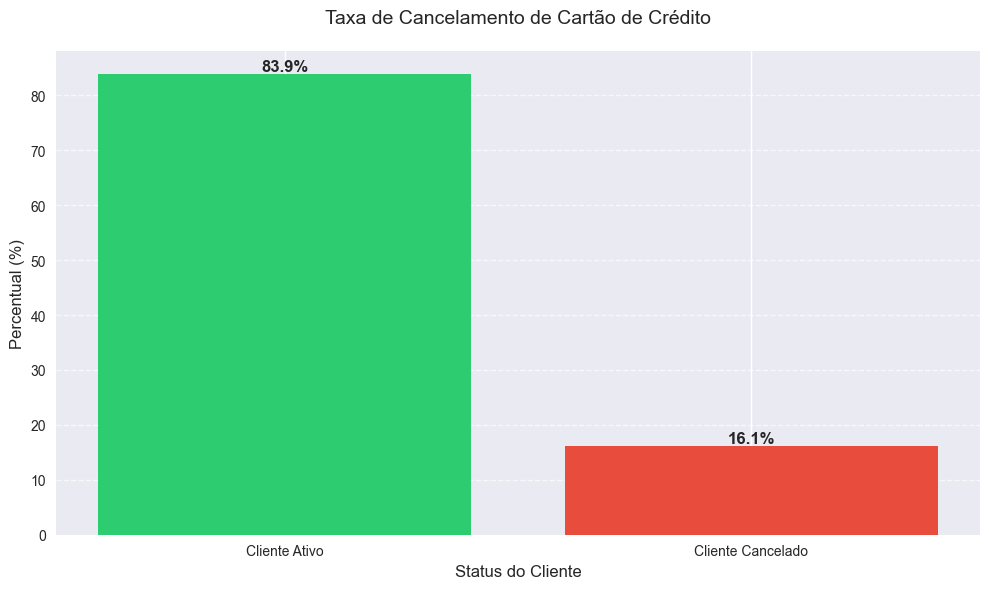

In [12]:
# Agrupa os dados por flag de churn e calcula percentuais
df_churn = (train.groupby('churn_flag')
            .size()
            .reset_index(name='total')
            .assign(percentual=lambda x: (x['total'] / x['total'].sum()) * 100)
            .sort_values('percentual'))

# Configuração do plot
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 6))

# Criação do gráfico de barras
cores = ['#e74c3c','#2ecc71']  # Verde para não-churn, vermelho para churn
barras = ax.bar(df_churn['churn_flag'], 
                df_churn['percentual'],
                color=cores)

# Personalização do gráfico
ax.set_title('Taxa de Cancelamento de Cartão de Crédito', 
             fontsize=14, 
             pad=20)
ax.set_xlabel('Status do Cliente', fontsize=12)
ax.set_ylabel('Percentual (%)', fontsize=12)

# Configuração dos eixos
ax.set_xticks([0, 1])
ax.set_xticklabels(['Cliente Ativo', 'Cliente Cancelado'], 
                   fontsize=10)

# Adiciona grid suave no eixo y
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adiciona valores nas barras
for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2,
            altura,
            f'{altura:.1f}%',
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold')

# Ajusta o layout
plt.tight_layout()

# Remove bordas desnecessárias
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

A variável-alvo está **desbalanceada**: **16,1% dos clientes são churners**. Para lidar com isso, adotarei as seguintes estratégias:  

- **Hold-out estratificado e validação cruzada k-fold estratificada**:  
  - Manterei a proporção da variável-alvo nos conjuntos de **teste e validação**, inclusive durante o ajuste de hiperparâmetros.  

- **Definição de pesos diferentes para as classes majoritária e minoritária**:  
  - Atribuirei **pesos mais altos para a classe minoritária** (churners).  
  - Dessa forma, o modelo será **penalizado** ao classificar erroneamente um cliente que cancelou a conta.  
  - Esses pesos serão configurados no hiperparâmetro específico do modelo.  

- **Análise do trade-off entre precisão e recall** (se necessário):  
  - O objetivo principal é **prever probabilidades de churn**, e não apenas classificações binárias.  
  - Isso permitirá que o banco **tome decisões mais informadas**.  
  - Em vez de apenas prever se um cliente irá cancelar ou não, o banco poderá verificar **a probabilidade de churn** e agir preventivamente.  

### Distribuição das Variáveis Numéricas  
Agora, analisarei as **distribuições das variáveis numéricas** para verificar:  
- **Assimetria nas distribuições**;  
- **Valores mais comuns entre os clientes do banco**.

In [9]:
def plotar_analise(dados, caracteristicas, hue=None, figsize=(24, 20)):
    """
    Função para criar histogramas das características numéricas.
    
    Parâmetros:
    - dados: DataFrame contendo os dados a serem plotados
    - caracteristicas: Lista com os nomes das características
    - hue: Nome da coluna para colorir o histograma (opcional)
    - figsize: Tupla indicando o tamanho da figura
    """
    # Dicionário para tradução dos nomes das características
    traducoes = {
        'customer_age': 'Idade do Cliente',
        'months_on_book': 'Meses como Cliente',
        'credit_limit': 'Limite de Crédito',
        'total_revolving_bal': 'Saldo Rotativo Total',
        'avg_open_to_buy': 'Média Disponível para Compra',
        'total_amt_chng_q4_q1': 'Variação Total Valor (Q4-Q1)',
        'total_trans_amt': 'Valor Total de Transações',
        'total_trans_ct': 'Quantidade Total de Transações',
        'total_ct_chng_q4_q1': 'Variação Total Quantidade (Q4-Q1)',
        'avg_utilization_ratio': 'Taxa Média de Utilização',
        'total_relationship_count': 'Total de Produtos'
    }
    
    # Configurações de estilo
    plt.style.use('seaborn')
    fig = plt.figure(figsize=figsize)
    
    # Paleta de cores personalizada
    cores = ['#2ecc71', '#e74c3c'] if hue else 'brown'
    
    for i, caracteristica in enumerate(caracteristicas):
        plt.subplot(len(caracteristicas) // 3 + 1, 3, i + 1)
        
        # Criar histograma com KDE
        sns.histplot(
            data=dados,
            x=caracteristica,
            hue=hue,
            kde=True,
            palette=cores if hue else cores,
            alpha=0.6,
            multiple="layer" if hue else "layer"
        )
        
        # Personalizar o gráfico
        plt.title(traducoes[caracteristica], fontsize=12, pad=10)
        plt.xlabel('Valor', fontsize=10)
        plt.ylabel('Frequência', fontsize=10)
        plt.grid(True, alpha=0.3)
        
        # Ajustar a legenda se houver hue
        if hue:
            plt.legend(title='Status do Cliente',
                      labels=['Ativo', 'Cancelado'],
                      bbox_to_anchor=(1.05, 1),
                      loc='upper left')
        
        # Remover bordas superiores e direitas
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()



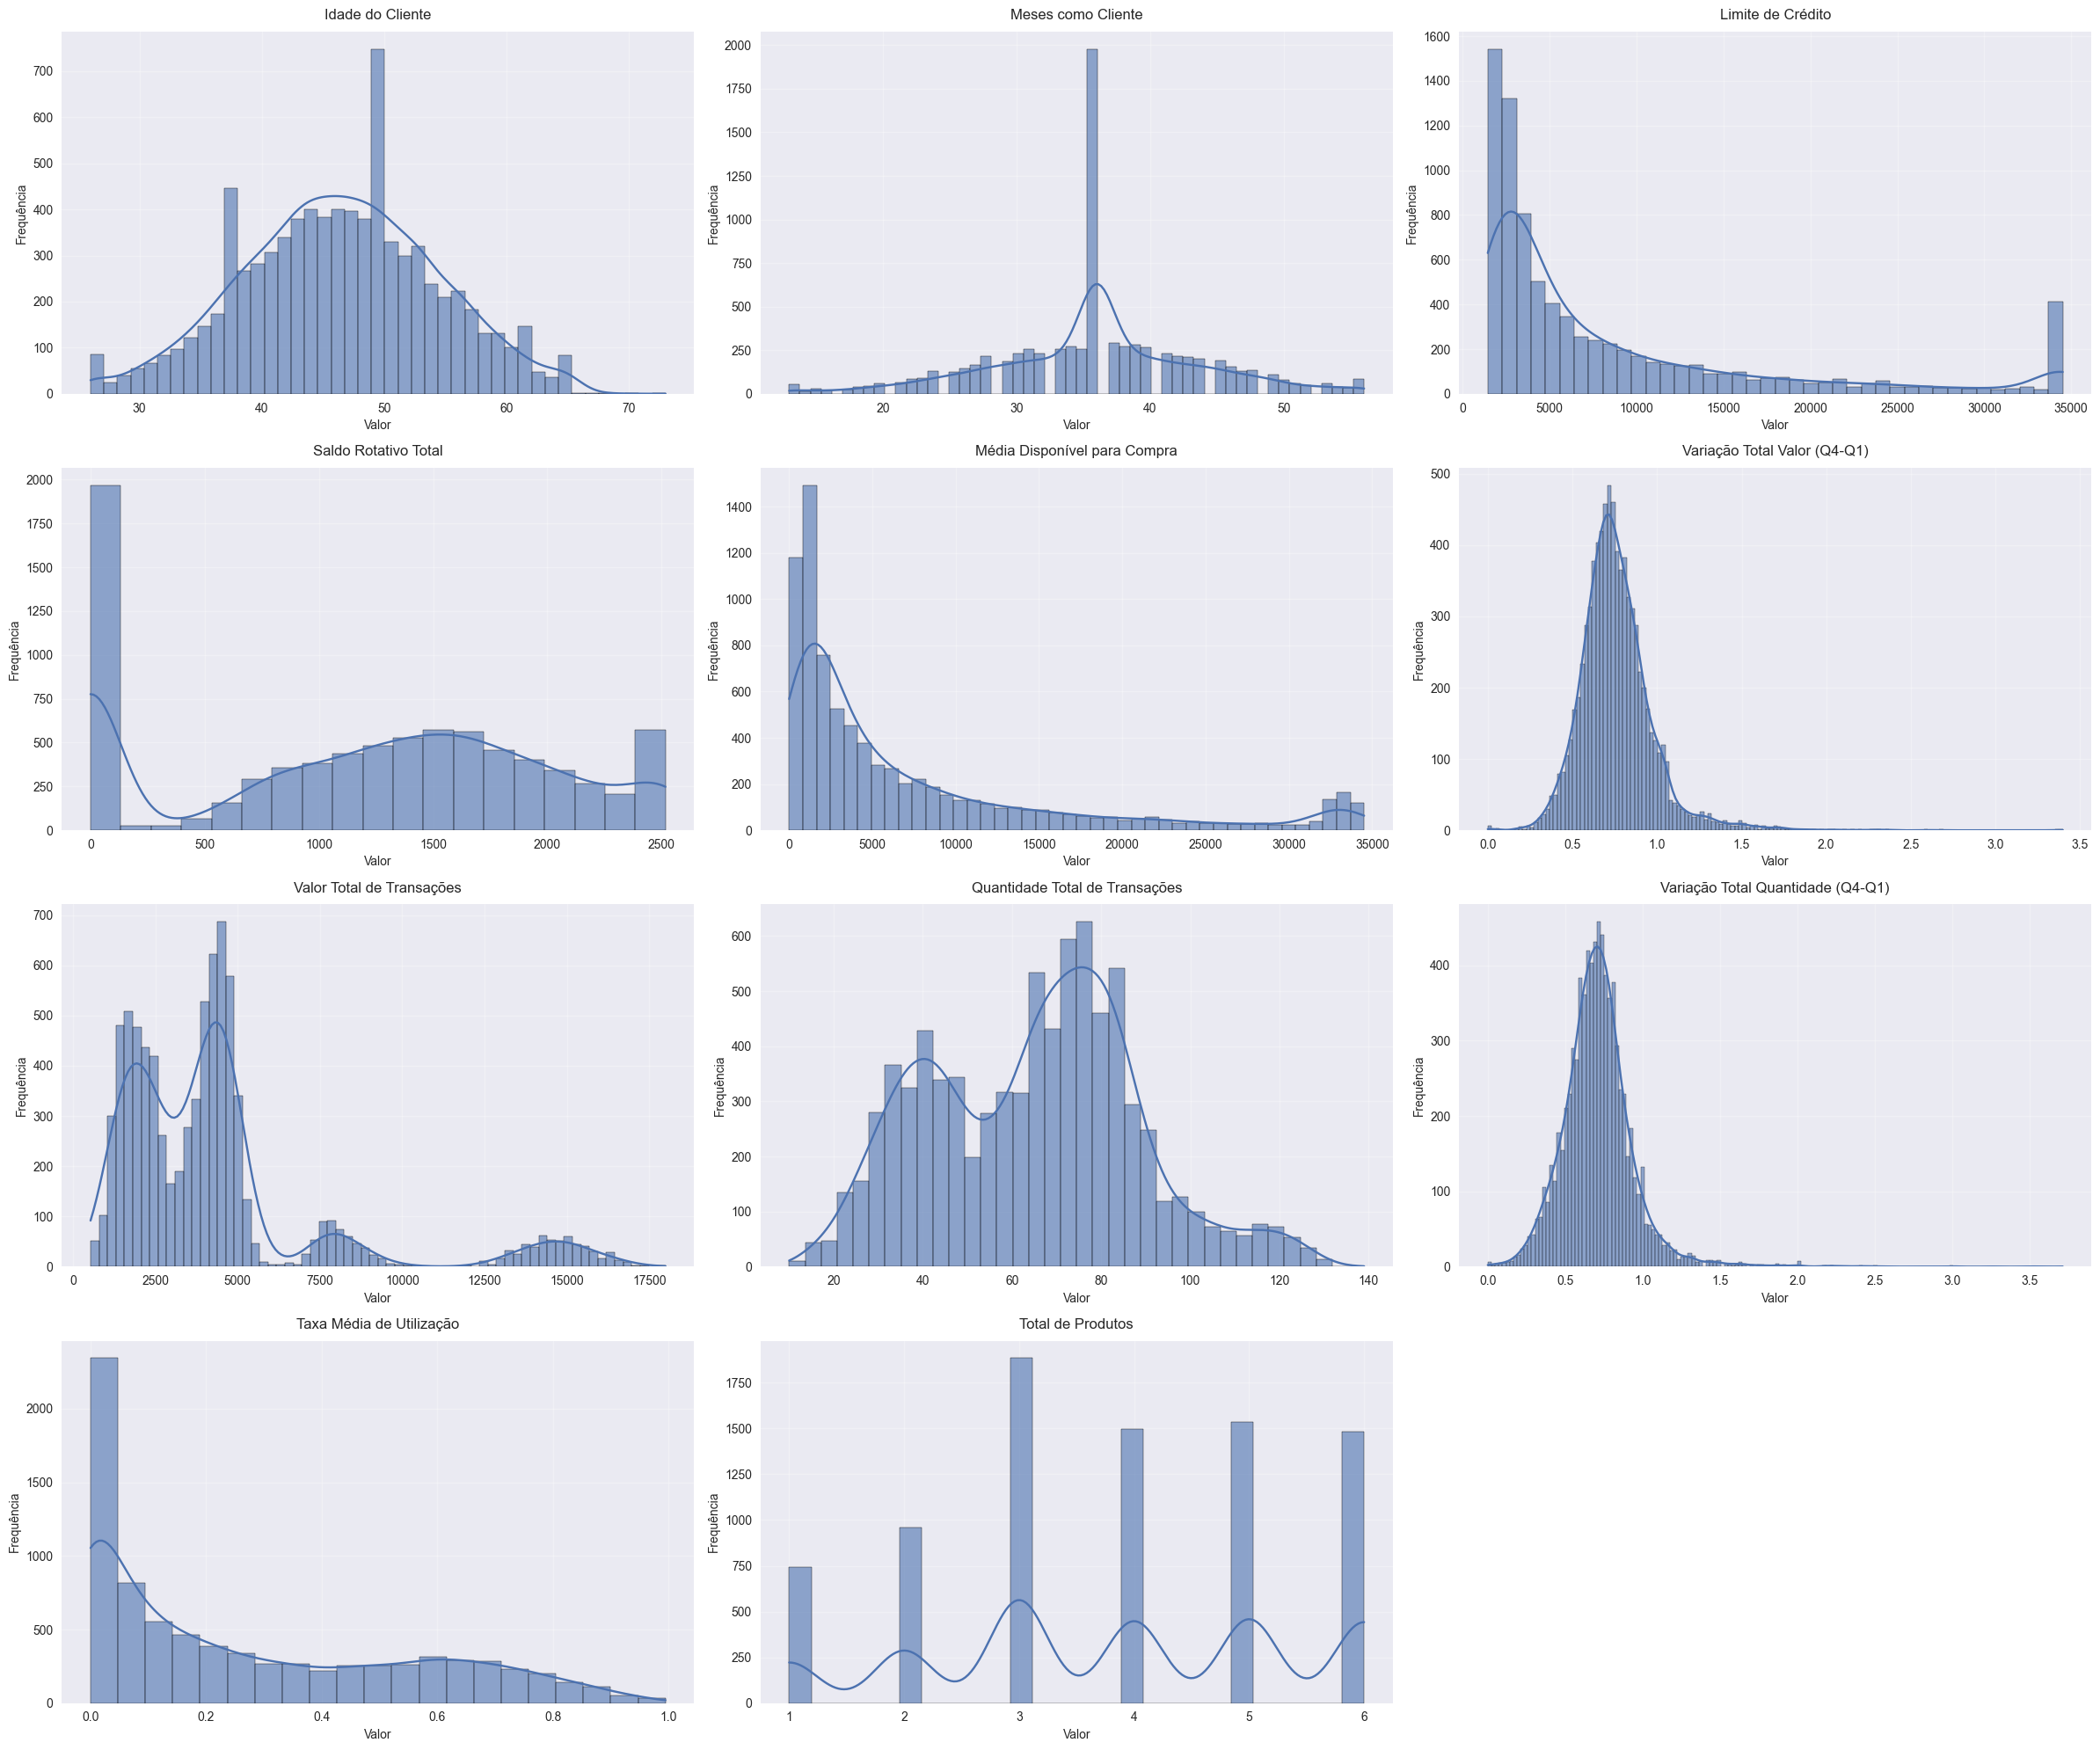

In [14]:
# Lista de características para análise
categoria_numericas = [
    'customer_age',
    'months_on_book',
    'credit_limit',
    'total_revolving_bal',
    'avg_open_to_buy',
    'total_amt_chng_q4_q1',
    'total_trans_amt',
    'total_trans_ct',
    'total_ct_chng_q4_q1',
    'avg_utilization_ratio',
    'total_relationship_count'
]

# Criar os gráficos
plotar_analise(dados=train, caracteristicas=categoria_numericas)

### **Insights:**  

- **Idade:** A maioria dos clientes tem entre **40 e 50 anos**.  
- **Tempo de relacionamento:** Grande parte dos clientes utiliza o cartão de crédito do banco há **36 meses**.  
- **Limite de crédito:**  
  - A distribuição é **assimétrica à direita** (right-skewed).  
  - Isso indica que a maioria dos clientes tem **limites de crédito baixos**, enquanto **poucos possuem limites altos**.  
  - Cerca de **5% dos clientes possuem limites elevados**, em torno de **35.000**.  
  - **Avg_Open_To_Buy e Avg_Utilization_Ratio** também apresentam assimetria positiva.  

- **Taxa média de utilização:**  
  - A **distribuição é assimétrica à direita**, indicando que **a maioria dos clientes utiliza pouco o serviço**.  
  - **Cerca de 25% dos clientes apresentam uma taxa de utilização igual a zero**.  
  - O banco deve **planejar estratégias para aumentar a utilização** e, consequentemente, **a receita**.  

- **Total Revolving Balance:**  
  - **25% dos clientes apresentam saldo revolvente total igual a zero**.  
  - Saldo revolvente baixo (especialmente zero) pode indicar **alta probabilidade de churn**.  
  - Como **Avg_Utilization_Ratio e Total_Revolving_Balance possuem a mesma proporção de registros zerados**, essas variáveis podem estar **correlacionadas** (a ser investigado posteriormente).  

- **Contagem e valor total de transações:**  
  - As distribuições apresentam **dois picos**.  
  - Isso sugere que há uma **diferença entre clientes que cancelaram e os que permaneceram**.  
  - Investigarei essa relação mais a fundo.  
  - Muitos clientes realizaram **cerca de 80 ou 40 transações** no último ano.  
  - Valores de transação em torno de **5.000 e 2.500** são comuns.  

- **Número de produtos do banco:**  
  - Cerca de **80% dos clientes possuem pelo menos 3 produtos do banco**.  

---

### **Outliers**  
Agora, investigarei **outliers** para identificar possíveis **erros de medição ou informações inconsistentes**.  
- Após essa análise, decidirei **se e como tratarei esses outliers**.  
- Também irei **plotar boxplots** para visualizar melhor essas observações.

In [12]:
def check_outliers(data: pd.DataFrame, features: list) -> pd.DataFrame:
    """
    Identifica e calcula a porcentagem de outliers para cada característica usando o método IQR.
    
    Parâmetros:
    - data: DataFrame com os dados
    - features: Lista de características para análise
    
    Retorna:
    - DataFrame com a porcentagem de outliers por característica
    """
    
    resultados = []
    
    for feature in features:
        # Calcula Q1, Q3 e IQR
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define limites para outliers
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Conta outliers
        n_outliers = data[
            (data[feature] < limite_inferior) | 
            (data[feature] > limite_superior)
        ].shape[0]
        
        # Calcula porcentagem
        pct_outliers = (n_outliers / len(data)) * 100
        
        resultados.append({
            'caracteristica': feature,
            'total_registros': len(data),
            'n_outliers': n_outliers,
            'pct_outliers': round(pct_outliers, 2)
        })
    
    # Cria DataFrame com resultados
    df_outliers = pd.DataFrame(resultados)
    
    # Ordena por porcentagem de outliers (decrescente)
    df_outliers = df_outliers.sort_values('pct_outliers', ascending=False)
    
    return df_outliers


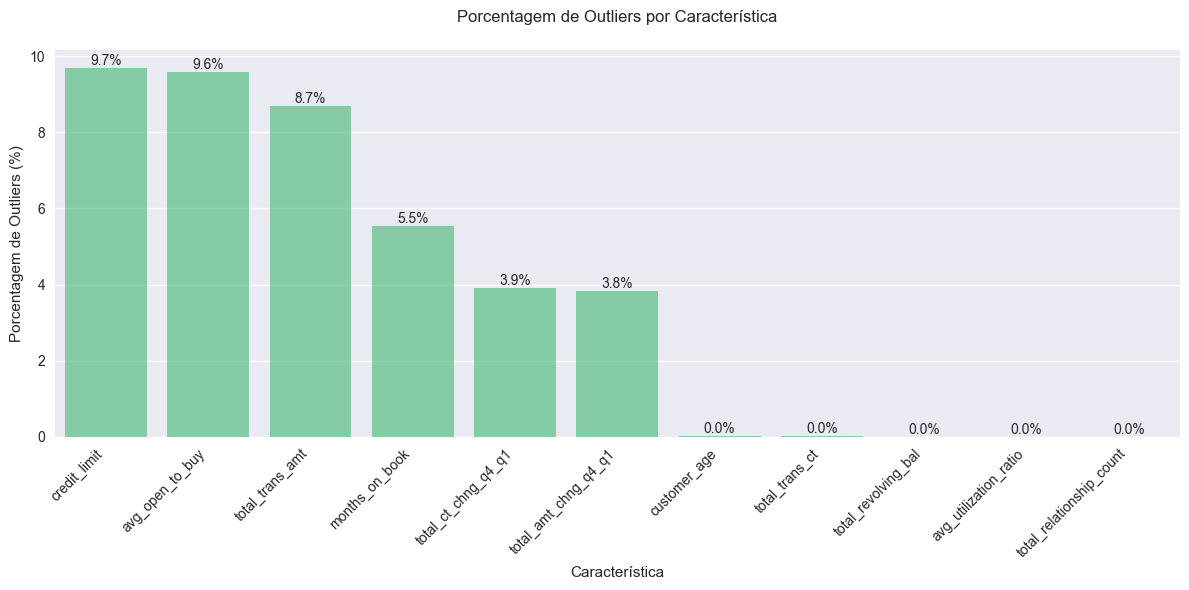

In [15]:
# Analisa outliers
df_outliers = check_outliers(train, categoria_numericas)

# Visualização dos resultados
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_outliers,
    x='caracteristica',
    y='pct_outliers',
    color='#2ecc71',
    alpha=0.6
)

plt.title('Porcentagem de Outliers por Característica', pad=20)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Característica')
plt.ylabel('Porcentagem de Outliers (%)')

# Adiciona valores nas barras
for i, v in enumerate(df_outliers['pct_outliers']):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()



As proporções de outliers são baixas em cada categoria. Além disso, uma vez que não representam informações inconsistentes como erros de medição, não as removerei.

### **Distribuição das Variáveis Categóricas**  

Agora, analisarei a **distribuição das variáveis categóricas** para entender:  
- **As características mais comuns dos clientes do banco**.  
- **Padrões que possam indicar tendências de churn**.  

Além disso, incluirei **algumas variáveis discretas** nos gráficos, pois será mais fácil visualizá-las utilizando **gráficos de contagem (countplot)**.

In [16]:
barplot_discrete_features = ['gender', 
                             'dependent_count', 
                             'months_inactive_12_mon', 
                             'contacts_count_12_mon']
barplot_features = barplot_discrete_features + variaveis_categoricas
print(barplot_features)

['gender', 'dependent_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'education_level', 'marital_status', 'income_category', 'card_category']


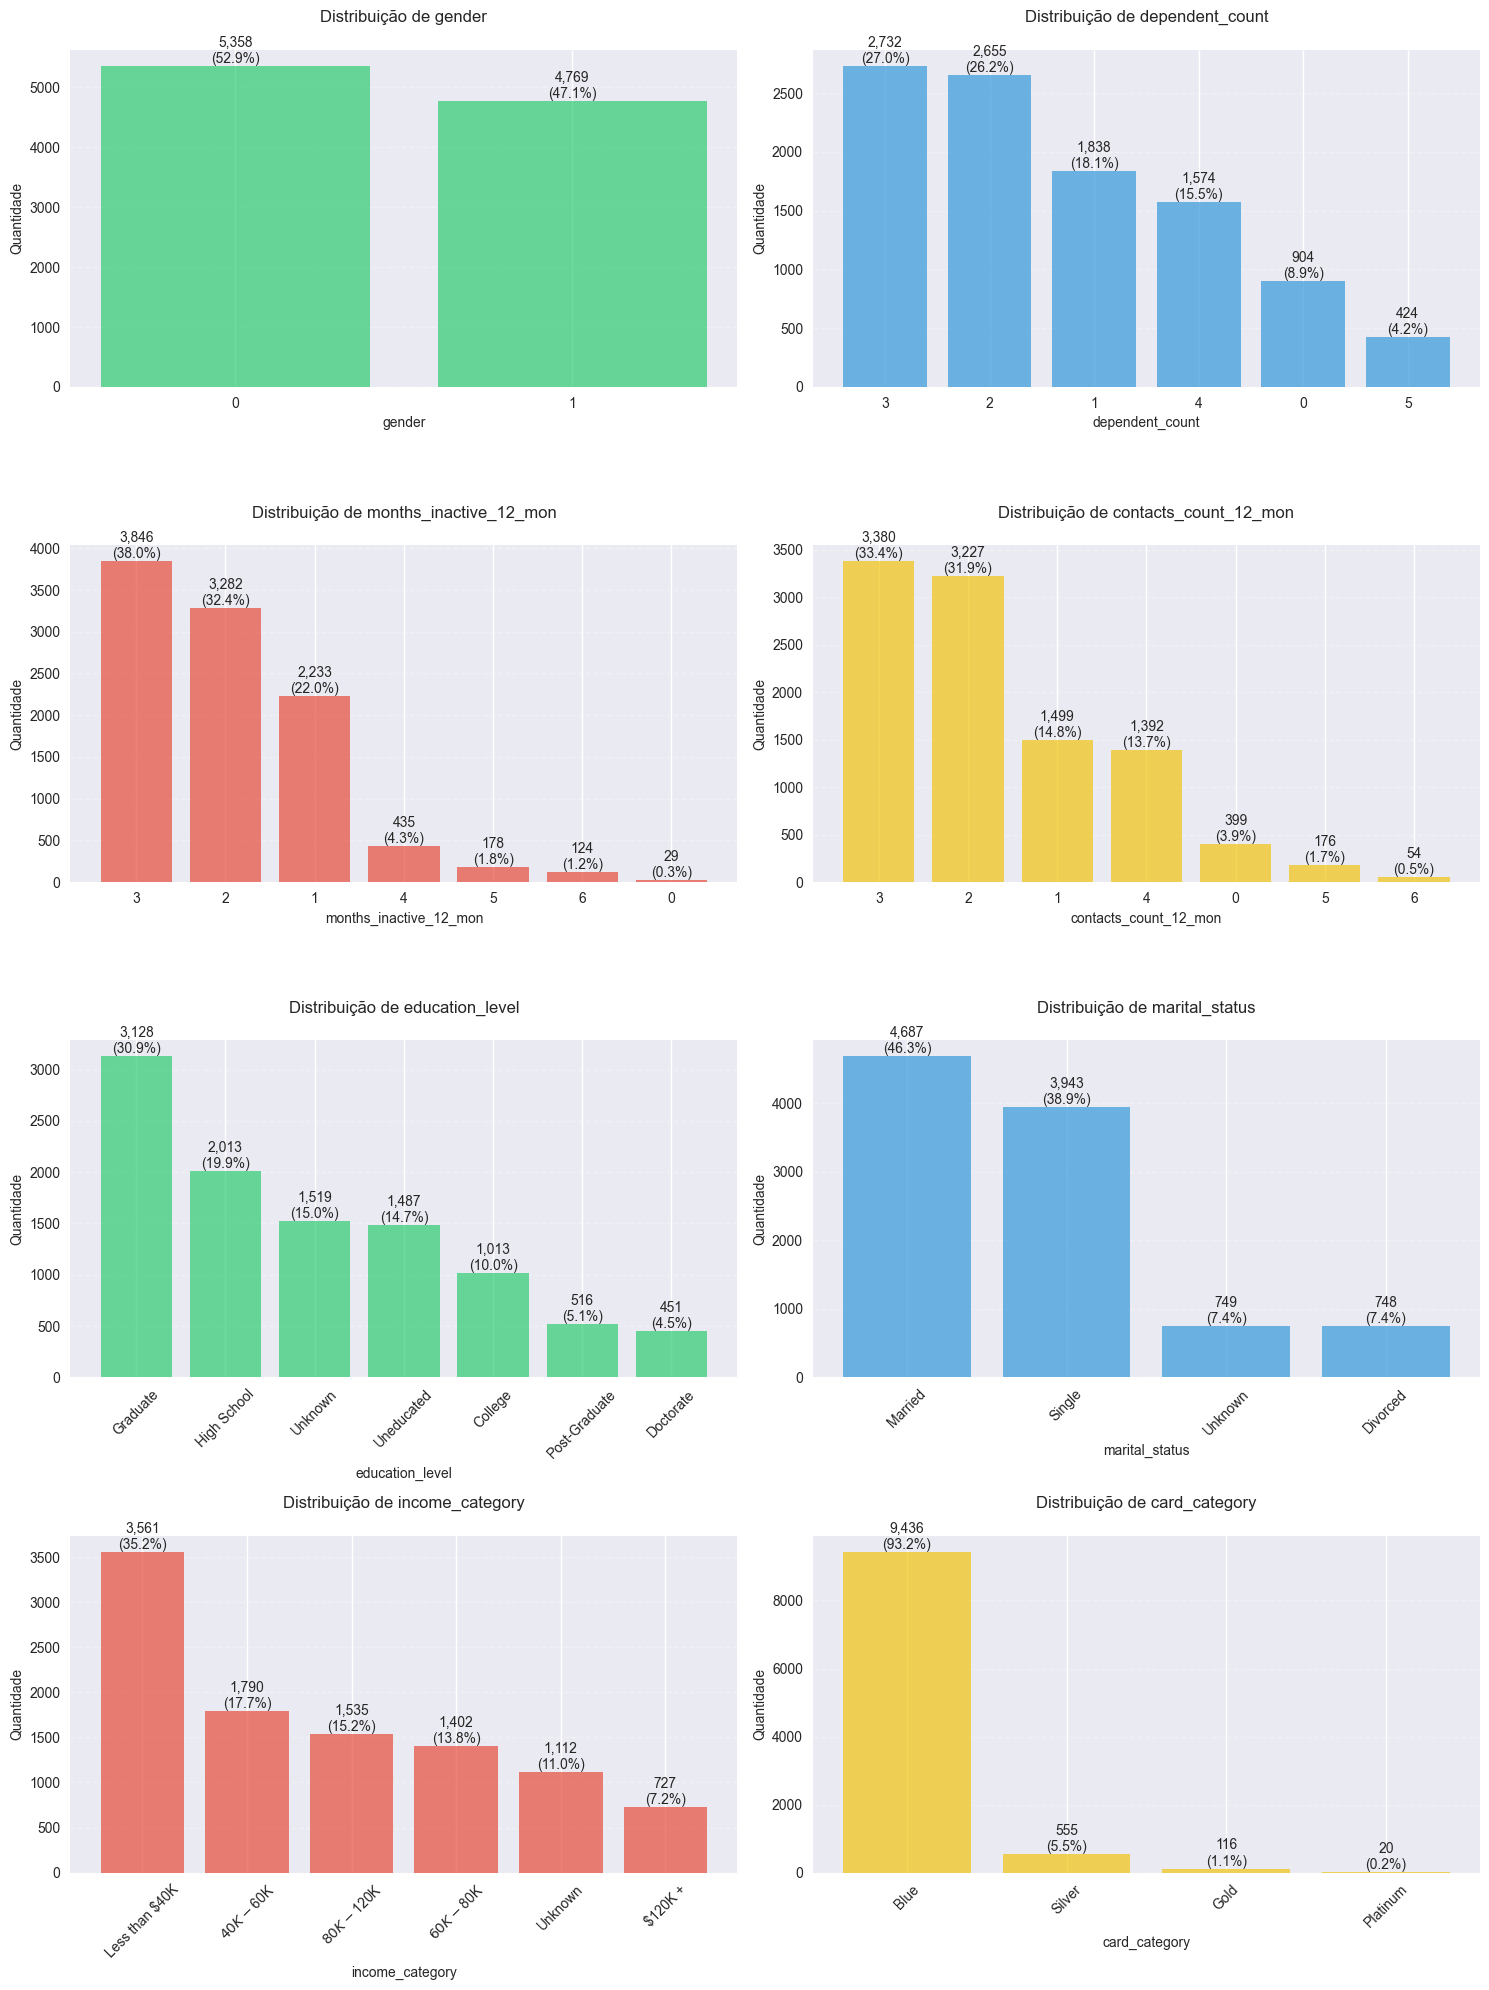

In [21]:
def plotar_distribuicao_barras(df, features):
    """
    Cria gráficos de barra mostrando a distribuição das características selecionadas.
    
    Parâmetros:
    - df: DataFrame com os dados
    - features: Lista de características para análise
    """
    # Configurações do plot
    n_features = len(features)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Configuração do estilo
    plt.style.use('seaborn')
    cores = ['#2ecc71', '#3498db', '#e74c3c', '#f1c40f']
    
    for idx, feature in enumerate(features):
        row = idx // n_cols
        col = idx % n_cols
        
        # Calcula as contagens e percentuais
        contagem = df[feature].value_counts()
        percentual = (contagem / len(df) * 100).round(1)
        
        # Cria o gráfico de barras
        ax = axes[row, col]
        barras = ax.bar(contagem.index.astype(str), 
                       contagem.values,
                       color=cores[idx % len(cores)],
                       alpha=0.7)
        
        # Adiciona rótulos e títulos
        ax.set_title(f'Distribuição de {feature}', pad=20, fontsize=12)
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Quantidade', fontsize=10)
        
        # Adiciona valores nas barras
        for barra, valor, pct in zip(barras, contagem.values, percentual):
            ax.text(barra.get_x() + barra.get_width()/2,
                   valor,
                   f'{valor:,}\n({pct}%)',
                   ha='center',
                   va='bottom')
        
        # Remove bordas desnecessárias
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Adiciona grid suave
        ax.yaxis.grid(True, linestyle='--', alpha=0.3)
        
        # Rotaciona labels se necessário
        if max([len(str(x)) for x in contagem.index]) > 3:
            ax.tick_params(axis='x', rotation=45)
    
    # Remove subplots vazios se houver
    if n_features % n_cols != 0:
        for idx in range(n_features, n_rows * n_cols):
            fig.delaxes(axes[idx // n_cols, idx % n_cols])
    
    plt.tight_layout()
    plt.show()

# Features para análise


# Gera o gráfico
plotar_distribuicao_barras(df, barplot_features)

### **Insights:**  

- **Gênero:** **Quase 53%** dos clientes são **mulheres**.  
- **Dependentes:** **Mais de 50%** dos clientes têm **2 ou 3 dependentes**.  
- **Inatividade:**  
  - **90%** dos clientes ficaram **inativos de 1 a 3 meses** no último ano.  
  - O banco deve implementar **estratégias para aumentar a taxa de utilização** e **reduzir a inatividade**.  
- **Contato com o banco:**  
  - **65%** dos clientes entraram em contato **2 ou 3 vezes** no último ano.  
- **Perfil geral:**  
  - A maioria dos clientes é **casada ou solteira**.  
  - A maioria possui **ensino superior completo**.  
  - **Ganham menos de $40K** por ano.  
  - **Possuem o cartão de crédito Blue**.  
- **Distribuição desbalanceada em algumas variáveis:**  
  - Algumas categorias possuem **proporções extremamente baixas** de observações, como **0 meses de inatividade** e **6 contatos no último ano**.  
  - A variável **card_category** é **altamente desbalanceada**:  
    - **Quase 99%** dos clientes possuem cartões **Blue ou Silver**.  
    - O cartão **Blue corresponde a 93,3%** dos clientes.  
  - Isso será considerado na **etapa de modelagem**, pois:  
    - Categorias com **proporção extremamente baixa** podem levar a **overfitting**.  
    - **Card_category pode não ter poder discriminativo** para prever churn.  

---

### **Análise Bivariada e Multivariada**  
Agora, realizarei **análises bivariadas e multivariadas** para investigar:  
- **Relações entre as variáveis**.  
- **Relação das variáveis com o churn_flag**.  

---

### **Matriz de Correlação**  
Vou examinar a **matriz de correlação** para:  
- Identificar **relações lineares** entre as variáveis.  
- Verificar **força e direção** dessas relações, principalmente com a variável-alvo (**churn_flag**).

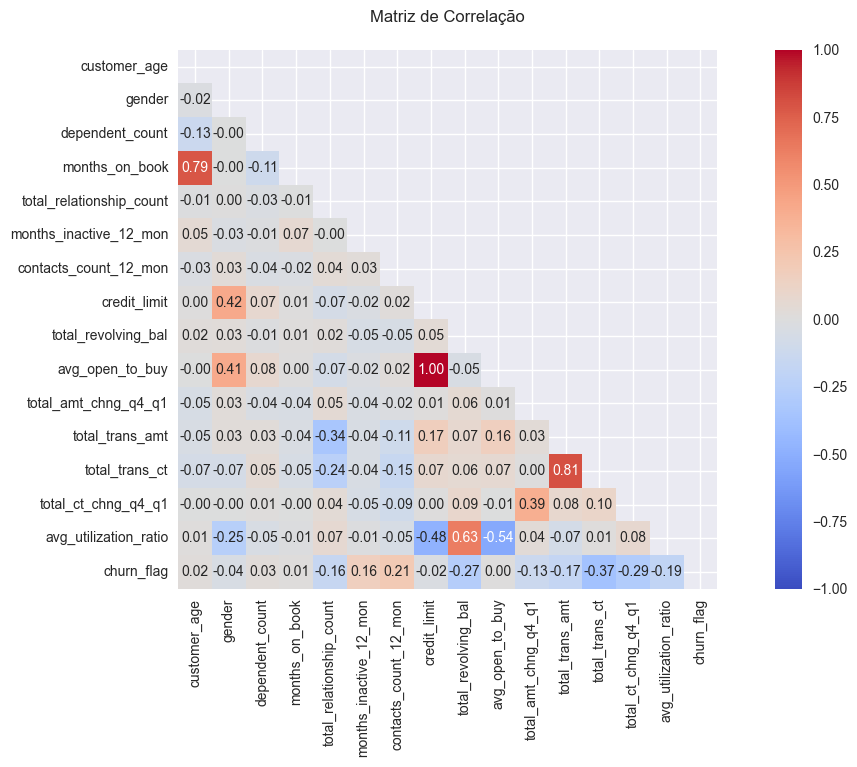

In [33]:
corr_matrix = train.corr(numeric_only=True)
plt.figure(figsize=(15, 7))
mask = np.triu(np.ones_like(train.corr(numeric_only=True), dtype=bool))
sns.heatmap(corr_matrix, 
            mask=mask,  # aplica a máscara
            vmin=-1, 
            vmax=1, 
            annot=True,  # mostra os valores
            cmap='coolwarm',  # esquema de cores
            center=0,  # centraliza o colormap em 0
            square=True,  # células quadradas
            fmt='.2f')  # formato dos números (2 casas decimais)
plt.title('Matriz de Correlação', pad=20)

plt.show()

### **Insights:**  

- **Correlação com Churn:**  
  - **Total_Trans_Ct, Total_Revolving_Bal e Total_Ct_Chng_Q4_Q1** têm **correlação negativa moderada** com churn.  
  - Faz sentido: **quanto menos transações o cliente faz, maior a probabilidade de churn**.  
  - Clientes com **menor saldo rotativo e menor variação no número de transações tendem a abandonar o serviço**.  

- **Idade x Tempo de Relacionamento:**  
  - **Idade do cliente e Months_on_book são fortemente correlacionados positivamente**.  
  - **Clientes mais velhos tendem a permanecer mais tempo no banco**.  
  - O banco deve **reter clientes antigos leais** e **aumentar a fidelidade dos clientes mais jovens**.  

- **Crédito e Utilização:**  
  - **Credit_Limit e Avg_Utilization_Ratio têm correlação negativa moderada**.  
  - Ou seja, **quanto maior o limite de crédito, menor a taxa de utilização média**.  
  - **Total_Revolving_Bal e Avg_Utilization_Ratio têm correlação positiva forte**.  
  - Clientes que **utilizam mais o cartão de crédito acumulam saldos rotativos maiores**.  

- **Diferenças de Gênero:**  
  - **Gênero tem correlação moderada positiva com Credit_Limit**.  
  - **Homens tendem a ter limites de crédito mais altos que mulheres**.  

- **Multicolinearidade:**  
  - Algumas variáveis têm **correlações muito altas**, como **Total_Trans_Amt e Total_Trans_Ct**.  
  - Isso pode gerar **problemas de multicolinearidade em modelos lineares**.  
  - Como **o foco é predição com algoritmos robustos (ex: LightGBM)**, não é uma preocupação imediata.  

- **Variáveis Redundantes:**  
  - **Avg_Open_To_Buy e Credit_Limit são perfeitamente correlacionadas** (**correlação = 1**).  
  - Isso ocorre porque **open_to_buy** representa o **valor disponível**, enquanto **credit_limit** representa o **limite total**.  
  - **Avg_Open_To_Buy será removida na etapa de modelagem, pois Credit_Limit é mais informativa**.

### Distribuições de categorias numéricas por rotatividade

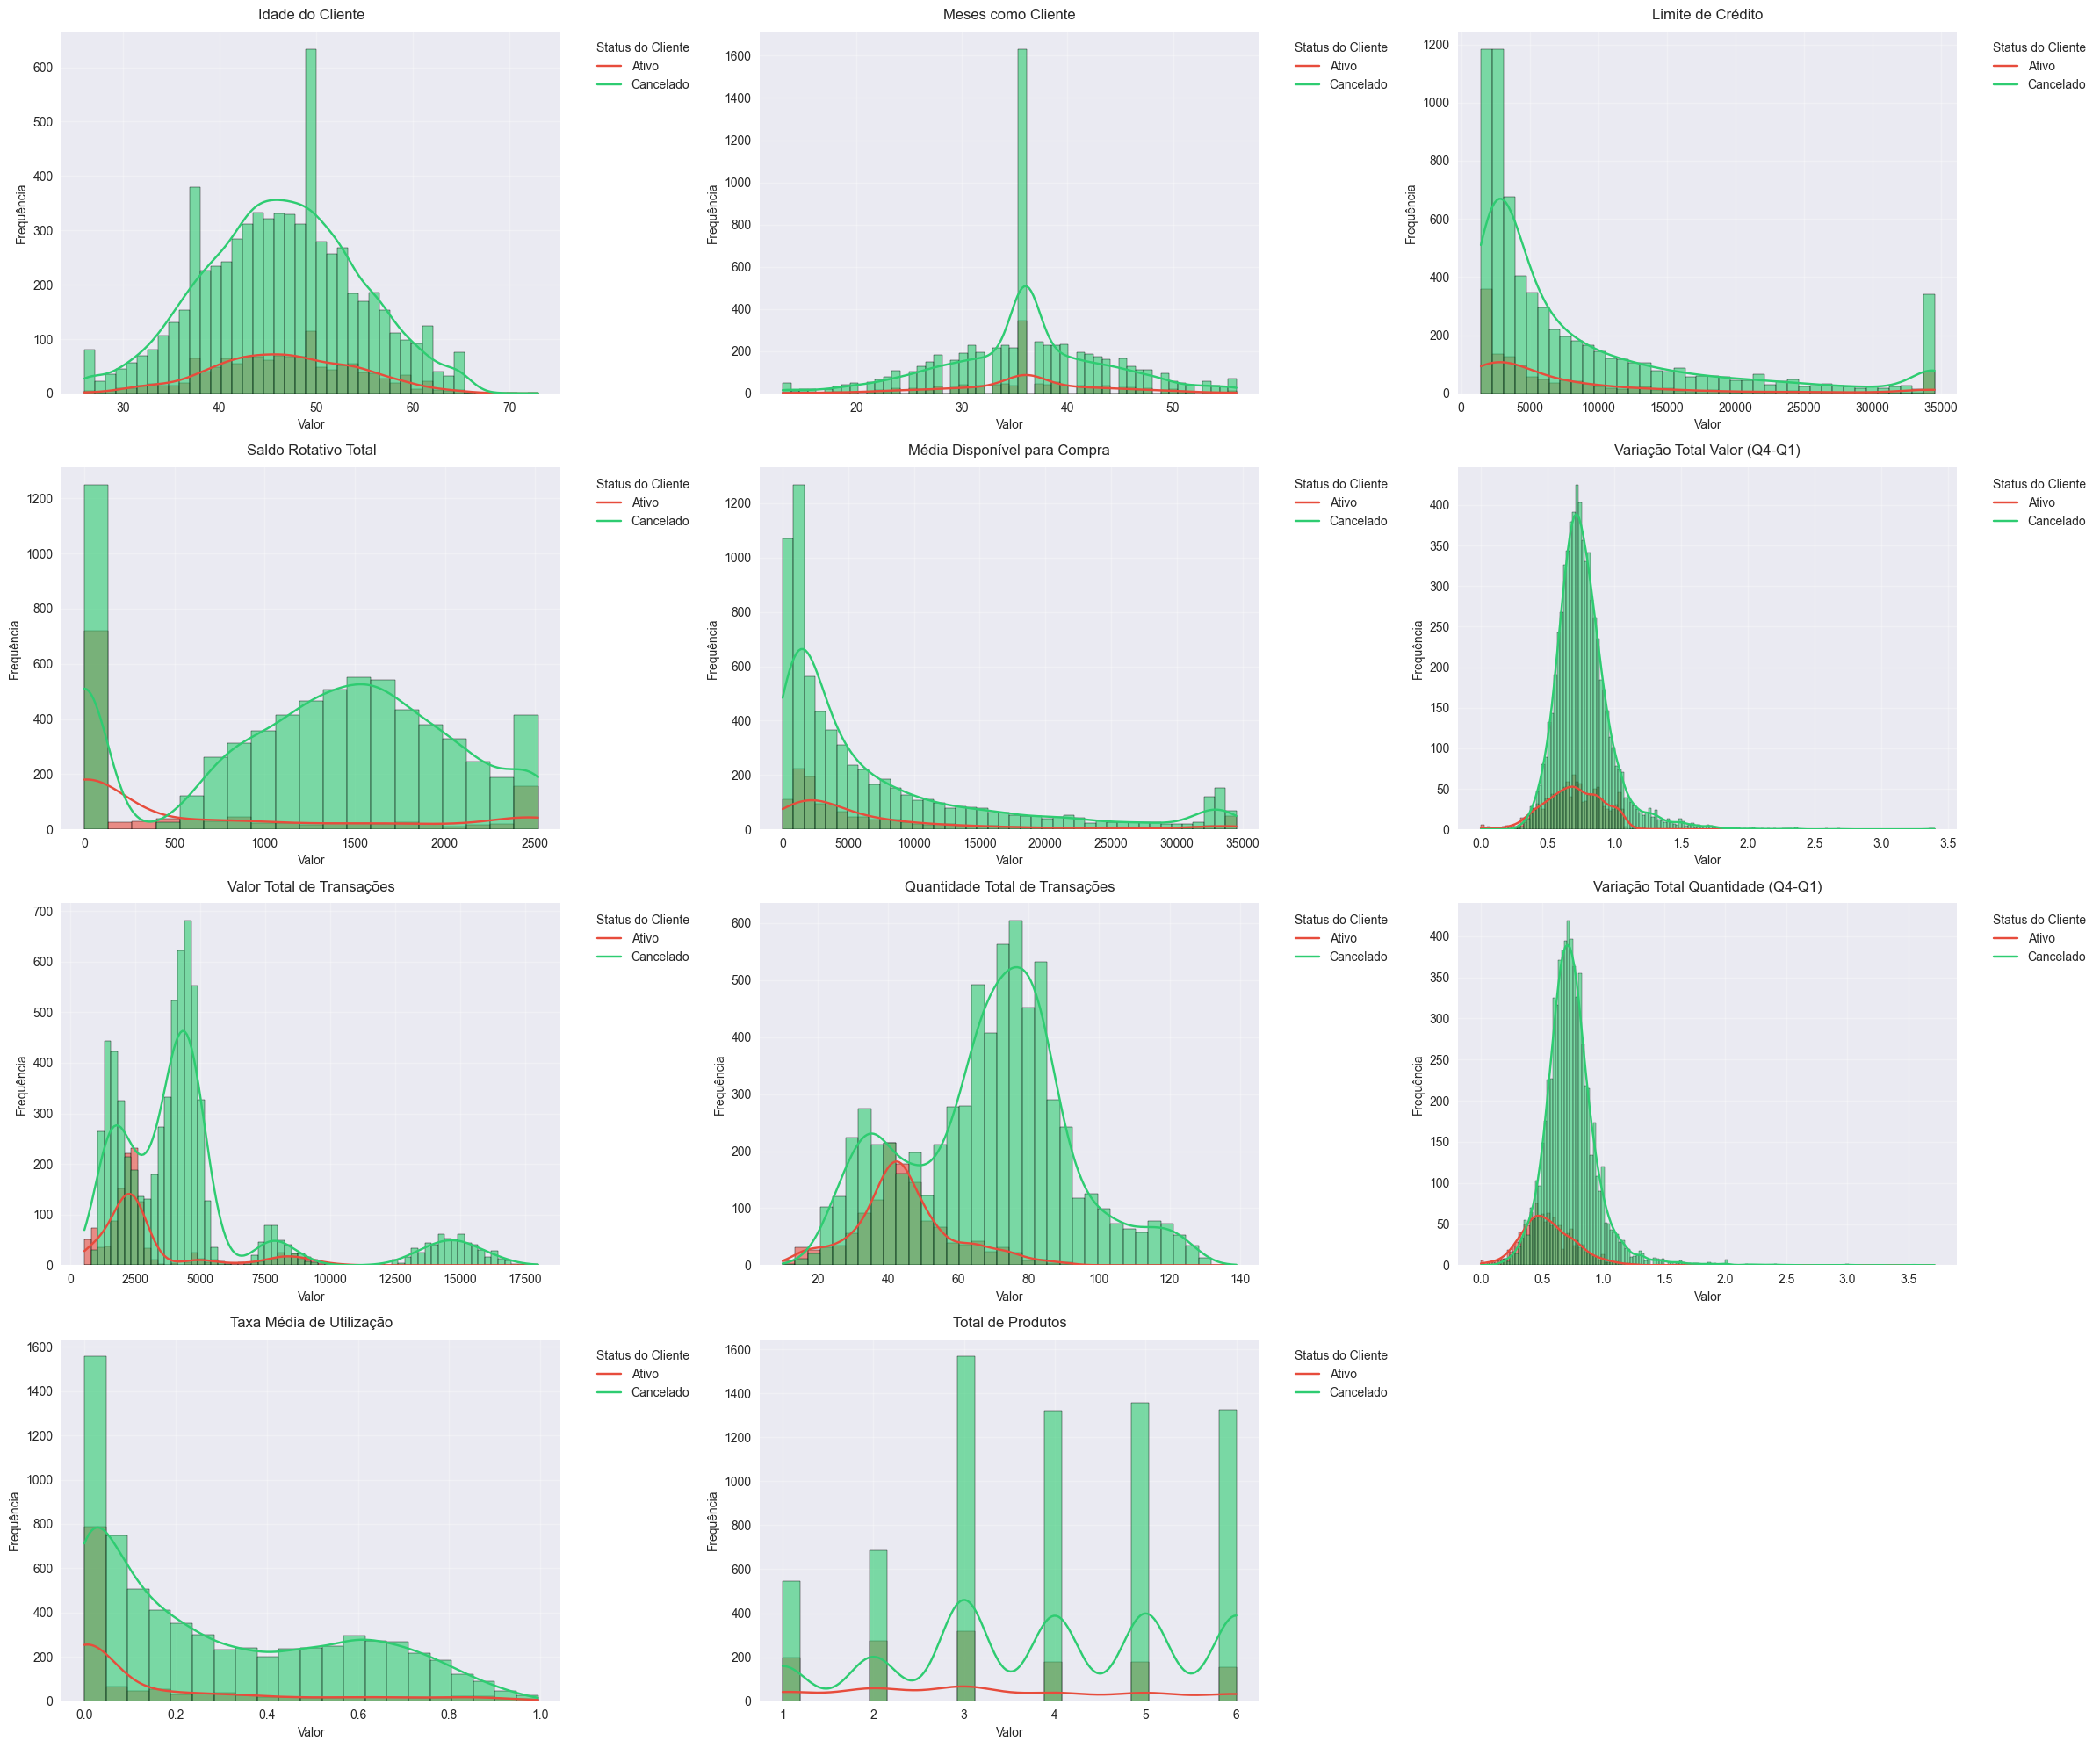

In [24]:
plotar_analise(train,categoria_numericas, hue='churn_flag')

### Variáveis categóricas x Churn


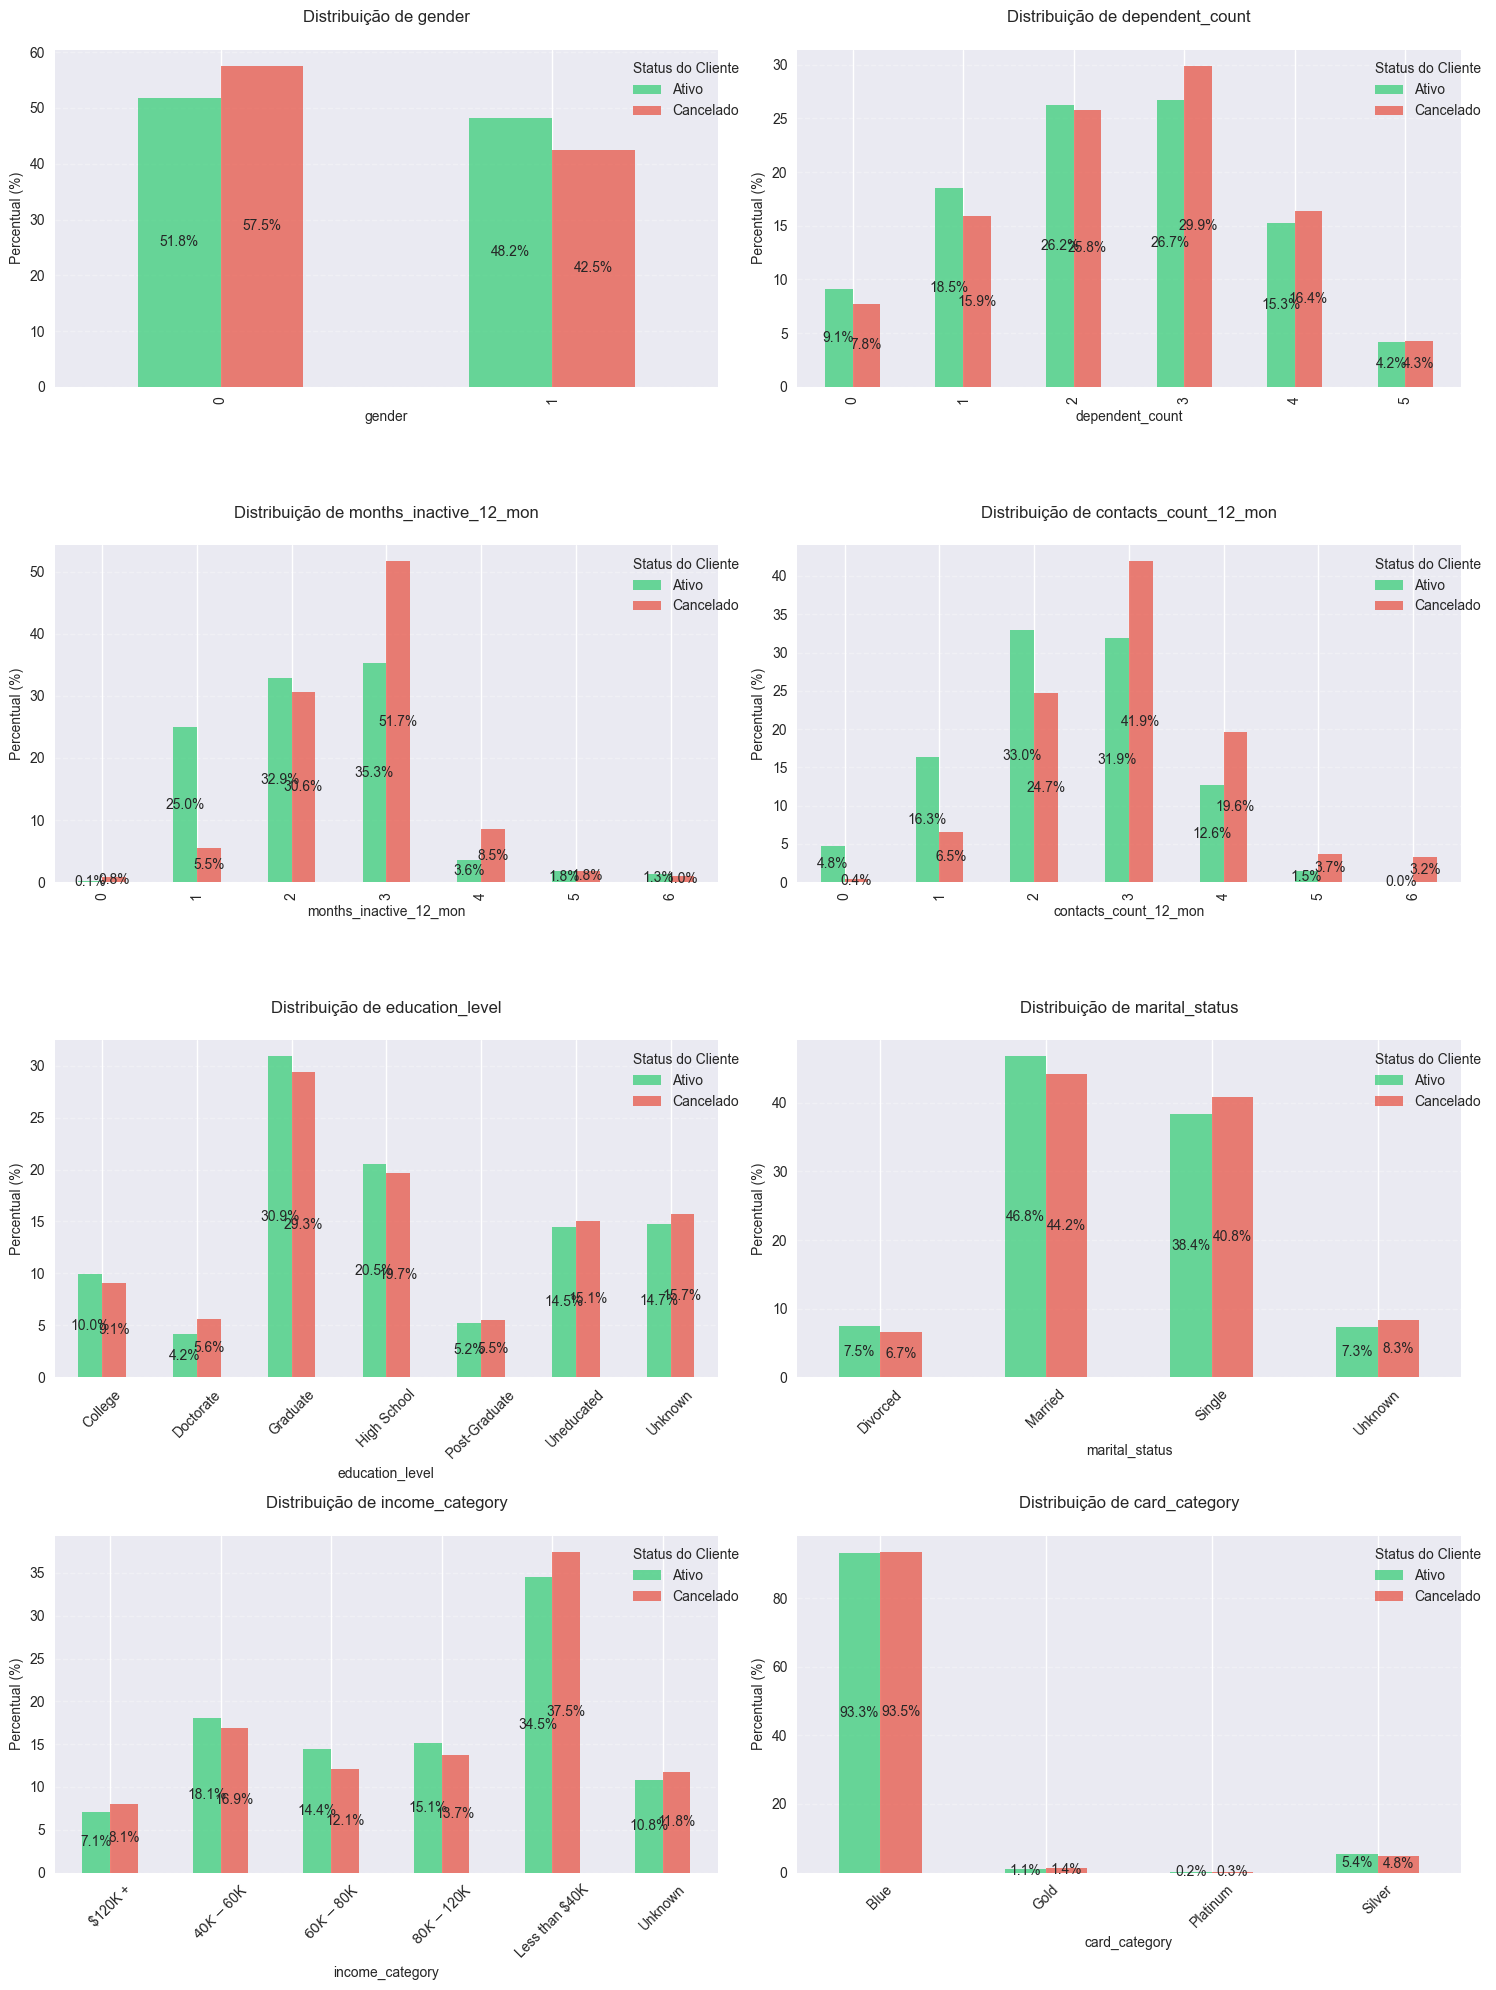

In [23]:
def plotar_distribuicao_barras(df, features, hue=None):
    """
    Cria gráficos de barra mostrando a distribuição das características selecionadas.
    
    Parâmetros:
    - df: DataFrame com os dados
    - features: Lista de características para análise
    - hue: Nome da coluna para segmentar os dados (opcional)
    """
    # Configurações do plot
    n_features = len(features)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Configuração do estilo
    plt.style.use('seaborn')
    cores = ['#2ecc71', '#e74c3c']  # Verde para não-churn, vermelho para churn
    
    for idx, feature in enumerate(features):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]
        
        # Calcula as contagens por grupo
        contagem = pd.crosstab(df[feature], df[hue], normalize='columns') * 100
        
        # Cria o gráfico de barras empilhadas
        contagem.plot(kind='bar', 
                    ax=ax,
                    color=cores,
                    alpha=0.7)
        
        # Adiciona rótulos nas barras
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', label_type='center')
        
        # Configura a legenda
        ax.legend(title='Status do Cliente',
                    labels=['Ativo', 'Cancelado'],
                    bbox_to_anchor=(1.05, 1))
            
       
        # Configurações comuns
        ax.set_title(f'Distribuição de {feature}', pad=20, fontsize=12)
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Percentual (%)' if hue else 'Quantidade', fontsize=10)
        
        # Remove bordas desnecessárias
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Adiciona grid suave
        ax.yaxis.grid(True, linestyle='--', alpha=0.3)
        
        # Rotaciona labels se necessário
        if max([len(str(x)) for x in df[feature].unique()]) > 3:
            ax.tick_params(axis='x', rotation=45)
    
    # Remove subplots vazios se houver
    if n_features % n_cols != 0:
        for idx in range(n_features, n_rows * n_cols):
            fig.delaxes(axes[idx // n_cols, idx % n_cols])
    
    plt.tight_layout()
    plt.show()


plotar_distribuicao_barras(train, barplot_features, hue='churn_flag')

### **Insights:**  

- **Número de Contatos e Churn:**  
  - O churn **aumenta consistentemente** à medida que **o número de contatos com o banco cresce**.  
  - **Todos os clientes que fizeram 6 contatos churnaram**.  

- **"Unknown" como Categoria Informativa:**  
  - Em **Marital_Status**, a categoria **"Unknown" tem a maior taxa de churn**.  
  - Em **Education_Level e Income_Category**, **"Unknown" tem a segunda maior taxa de churn**.  
  - **Removê-la introduziria perda de informação e viés**.  
  - **Decisão:** Manter **"Unknown" como uma categoria válida** no pré-processamento.  

- **Churn e Categoria do Cartão:**  
  - Apesar de **Card_Category ser altamente desbalanceada (93.3% Blue)**, o churn **varia entre as categorias**.  
  - **Platinum apresenta a maior taxa de churn**.  
  - Mesmo tendo **poucas observações**, pode ser **importante para a predição**.  
  - **Decisão:** Manter e avaliar importância da variável no modelo (ex: via feature importance do LightGBM).  

- **Gênero e Churn:**  
  - **Mulheres apresentam maior taxa de churn do que homens**.  

- **Clientes Sempre Ativos e Churn:**  
  - **Clientes que nunca ficaram inativos nos últimos 12 meses têm a maior taxa de churn**.  
  - **Isto é contraintuitivo** e pode indicar que esses clientes **estavam ativos apenas para encerrar a conta**.  

- **Nível Educacional e Churn:**  
  - **Clientes com doutorado apresentam a maior taxa de churn** entre os níveis educacionais.

### **Conclusões da Análise Exploratória (EDA)**  

#### **Principais Insights:**  

1️⃣ **Baixa Utilização do Serviço**  
   - O **average utilization ratio** é **assimétrico à direita** → **a maioria dos clientes utiliza pouco o serviço**.  
   - **25%** dos clientes têm **utilização zero** → Estratégias para **incentivar o uso do cartão são essenciais**.  

2️⃣ **Alta Inatividade dos Clientes**  
   - **90% dos clientes ficaram inativos de 1 a 3 meses no último ano**.  
   - Além de aumentar a utilização, o banco deve **reduzir períodos de inatividade**.  

3️⃣ **Muitos Clientes Entram em Contato**  
   - **75% dos clientes contataram o banco pelo menos 2 vezes no último ano**.  
   - O banco precisa entender **os motivos** dessas chamadas → **Insatisfação com o serviço? Problemas recorrentes?**  

4️⃣ **Idade e Tempo de Relacionamento com o Banco**  
   - **Clientes mais velhos permanecem mais tempo usando os serviços** → Forte correlação positiva entre **age e months on book**.  
   - **Foco em retenção de clientes mais antigos** e **aumento do tempo de relacionamento dos mais jovens**.  

5️⃣ **Limite de Crédito vs. Utilização**  
   - **Correlação negativa exponencial** → Quanto **maior o limite de crédito, menor a taxa de utilização**.  
   - Clientes com **limites altos usam menos o cartão**.  

6️⃣ **Padrão dos Clientes que Churnam**  
   - Clientes que churnam apresentam:  
     - **Menores limites de crédito**  
     - **Menores saldos rotativos**  
     - **Menores valores e quantidades de transações**  
     - **Menores variações na quantidade de transações**  
     - **Menores taxas de utilização (muitos com zero utilização)**  
   - **Isso faz sentido**, pois clientes propensos ao churn **reduzem o uso antes de cancelar o serviço**.  

7️⃣ **Número de Contatos e Churn**  
   - **Churn aumenta conforme os clientes entram em contato**.  
   - **Todos os clientes que ligaram 6 vezes churnaram** → Algo crítico está acontecendo com esses clientes.  
   - **Clientes com doutorado também têm maior taxa de churn**.  

📌 **Próximo Passo:** Considerar esses insights no **pré-processamento e modelagem preditiva** para prever e reduzir o churn.